In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
import datetime as dt
import matplotlib.style as style
# Use a clean stylizatino for our charts and graphs
import matplotlib.ticker as ticker
import xgboost as xgb
import catboost as cb
import os
import lightgbm as lgb
import seaborn as sns
#import catboost as cb
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '1.JPG',
 'capston.ipynb',
 'CAPSTONE PROJECT SOLUTION.ipynb',
 'capstone.ipynb',
 'catboost.ipynb',
 'catboost_info',
 'cat_feature_index.94f4af99-4a879910-1b13acd8-5e0527eb.tmp',
 'Challenge 1',
 'Fabiyi Opeyemi Capstone FInal Report.docx',
 'Microsoft.ipynb',
 'NEW',
 'submission.csv',
 'submission2.csv',
 'submission_format.csv',
 'test_values.csv',
 'train_labels.csv',
 'train_values.csv',
 'train_values.zip',
 '~$biyi Opeyemi Capstone FInal Report.docx',
 '~WRL0005.tmp',
 '~WRL0833.tmp']

In [3]:
train = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
test = pd.read_csv("test_values.csv")

In [4]:
train.head().T

,0,1,2,3,4
row_id,0,1,2,3,4
loan_type,3,1,2,1,1
property_type,1,1,1,1,1
loan_purpose,1,3,3,1,1
occupancy,1,1,1,1,1
loan_amount,70,178,163,155,305
preapproval,3,3,3,1,3
msa_md,18,369,16,305,24
state_code,37,52,10,47,37
county_code,246,299,306,180,20


In [5]:
train_labels.shape

(500000, 2)

In [6]:
test.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101,16,276,...,1,NaN,6329.0,59.536,69889.0,85.78,1874.0,2410.0,3791,True
1,1,1,1,1,1,252.0,2,87,20,68,...,1,107.0,2473.0,8.050,65313.0,100.00,947.0,1214.0,2839,True
2,2,1,1,1,1,270.0,1,-1,-1,-1,...,2,119.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,False
3,3,2,1,1,1,179.0,2,376,20,11,...,2,44.0,4795.0,29.676,57766.0,100.00,1426.0,1765.0,2153,True
4,4,2,1,1,1,36.0,2,254,48,156,...,3,32.0,5246.0,5.110,63332.0,100.00,1452.0,2092.0,5710,False


## Step1 : Performing basic Data Preprocessing 
Data Preprocessing to be done include;

1. Checking for `Duplicates`
2. Checking for `Missing Values`
3. Exploratory Data Analysis to gain insights from the data
4. Feature Engineering
5. Label Encoding of Categorical Variable

In [7]:
#------------------1. Checking for Duplicates----------------------------------------
print(train.shape)

print (train['row_id'].unique().shape)

print(train_labels.shape)

(500000, 22)
(500000,)
(500000, 2)


In [8]:
#Merging the target variable data with the other features
print('Shape before merging Data:', train.shape)
train=pd.merge(train,train_labels,how='inner', on='row_id')
print('Shape After merging Data:', train.shape)

Shape before merging Data: (500000, 22)
Shape After merging Data: (500000, 23)


In [9]:
train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

## Exploratory Data Analysis (EDA)

In [751]:
train['loan_amount'].min()

1.0

In [10]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [724]:
train['loan_amount'].mean()

221.753158

In [611]:
train['loan_amount'].max()

100878.0

In [ ]:
facet = sns.FacetGrid(join_train,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'applicant_income',shade=True)
facet.set(xlim=(0,join_train['applicant_income'].max()))
facet.add_legend()
plt.xlim(0,400)
plt.show()

In [39]:
train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

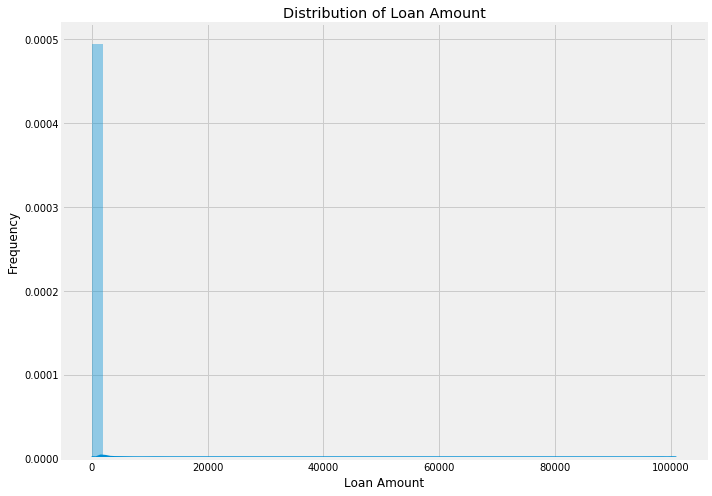

In [25]:
plt.figure(figsize=(10,7))
sns.distplot(train['loan_amount'])
plt.title("Distribution of Loan Amount")
plt.ylabel("Frequency")
plt.xlabel('Loan Amount')
plt.tight_layout()
plt.show()

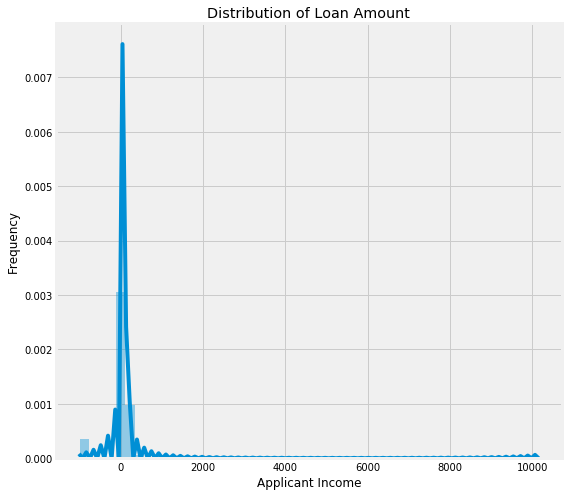

In [33]:
plt.figure(figsize=(8,7))
sns.distplot(train['applicant_income'])
plt.title("Distribution of Loan Amount")
plt.ylabel("Frequency")
plt.xlabel('Applicant Income')
plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

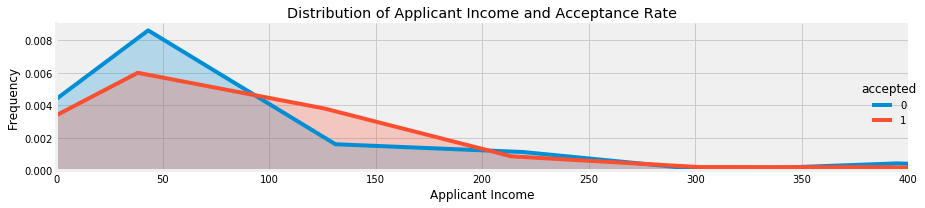

In [36]:
plt.figure(figsize=(15,10))
facet = sns.FacetGrid(train,hue='accepted',aspect=4)
facet.map(sns.kdeplot,'applicant_income',shade=True)
facet.set(xlim=(0,train['applicant_income'].max()))
facet.add_legend()
plt.title("Distribution of Applicant Income and Acceptance Rate")
plt.ylabel("Frequency")
plt.xlabel('Applicant Income')
plt.tight_layout()
plt.xlim(0,400)
plt.show()

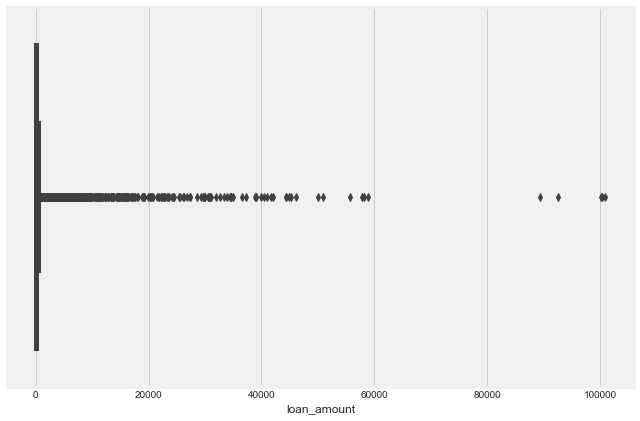

In [206]:
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_amount',data=train)

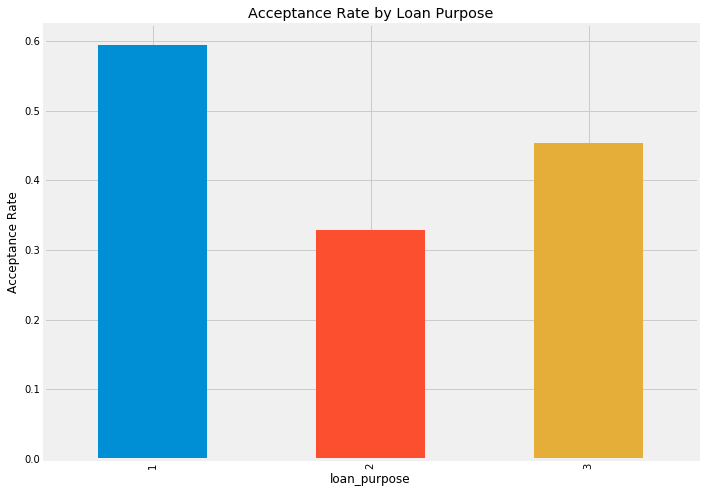

In [14]:
plt.figure(figsize=(10,7))
plt.title("Acceptance Rate by Loan Purpose")
plt.ylabel("Acceptance Rate")
plt.xlabel('Loan Purpose')
plt.tight_layout()
train.groupby(['loan_purpose'])['accepted'].mean().plot.bar()

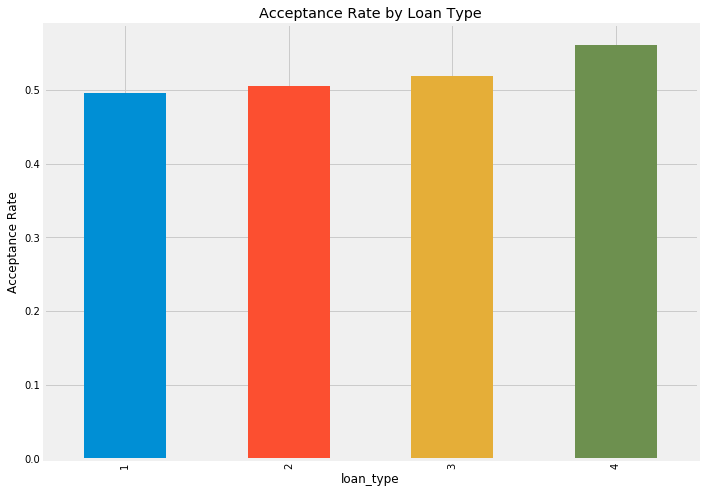

In [15]:
plt.figure(figsize=(10,7))
plt.title("Acceptance Rate by Loan Type")
plt.ylabel("Acceptance Rate")
plt.xlabel('Loan Type')
plt.tight_layout()
train.groupby(['loan_type'])['accepted'].mean().plot.bar()

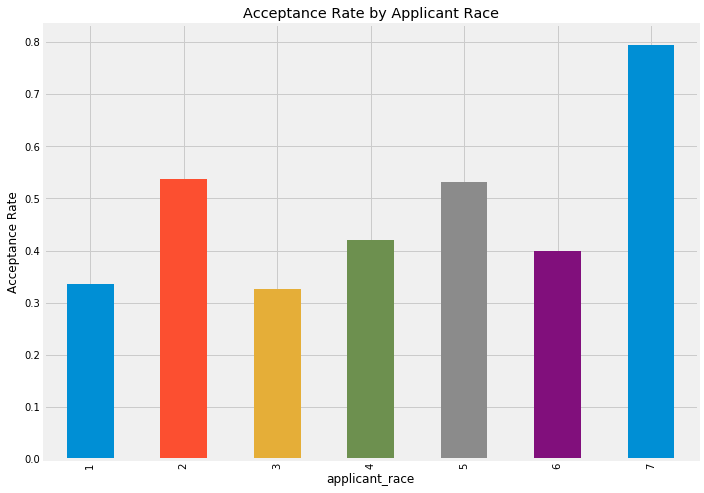

In [16]:
plt.figure(figsize=(10,7))
plt.title("Acceptance Rate by Applicant Race")
plt.ylabel("Acceptance Rate")
plt.xlabel('Applicant Race')
plt.tight_layout()
train.groupby(['applicant_race'])['accepted'].mean().plot.bar()

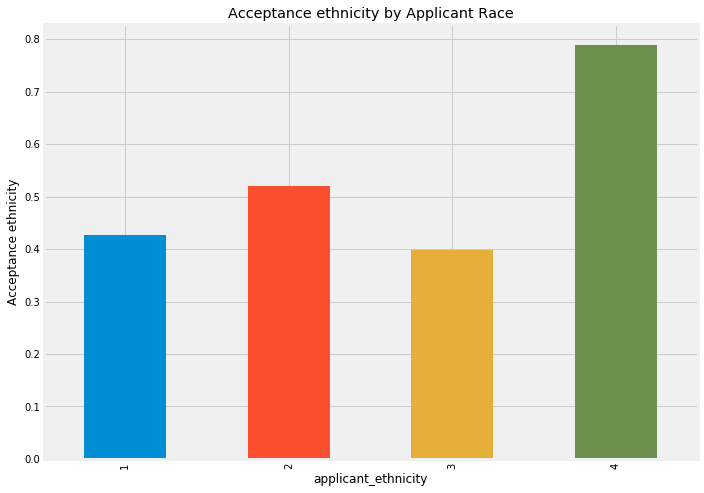

In [38]:
plt.figure(figsize=(10,7))
plt.title("Acceptance ethnicity by Applicant Race")
plt.ylabel("Acceptance ethnicity")
plt.xlabel('Applicant ethnicity')
plt.tight_layout()
train.groupby(['applicant_ethnicity'])['accepted'].mean().plot.bar()

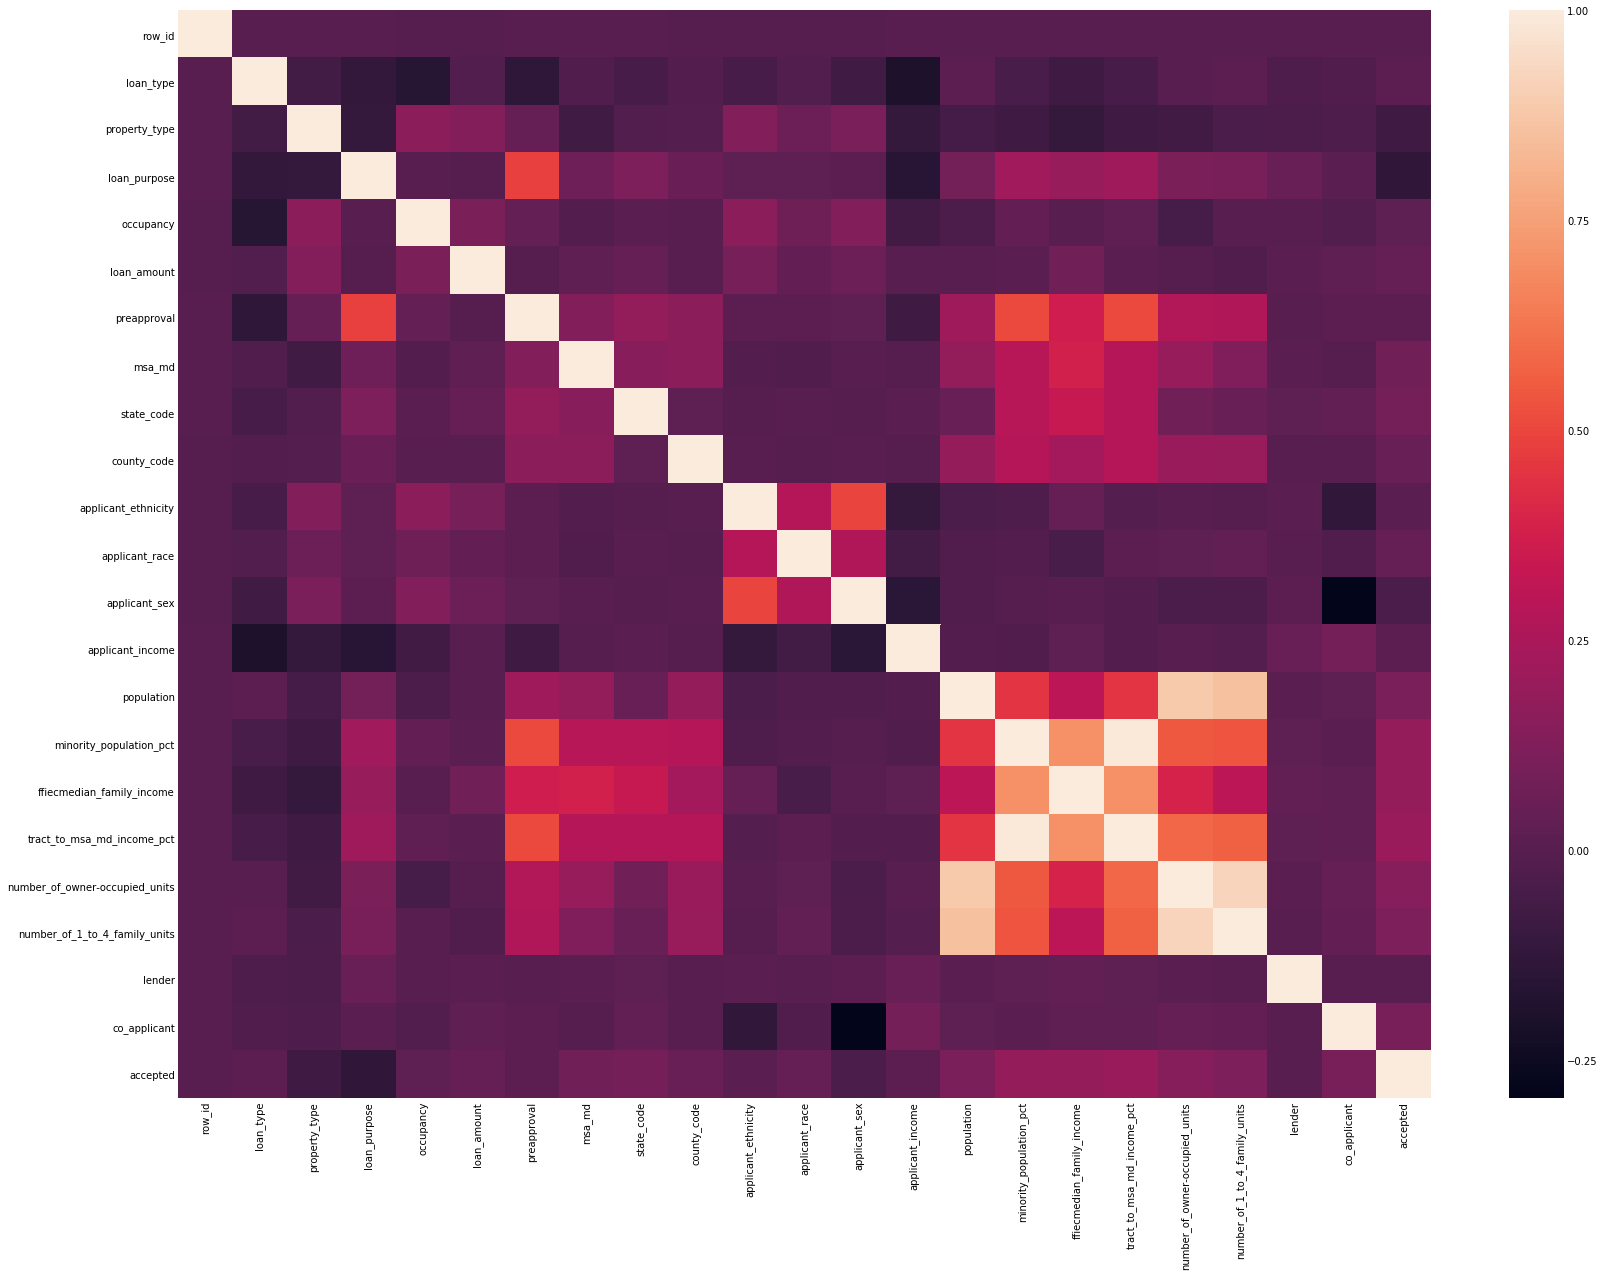

In [48]:
plt.figure(figsize=(25,20))
sns.heatmap(train.corr()).get_figure().savefig('Heat Map Correlation of features')


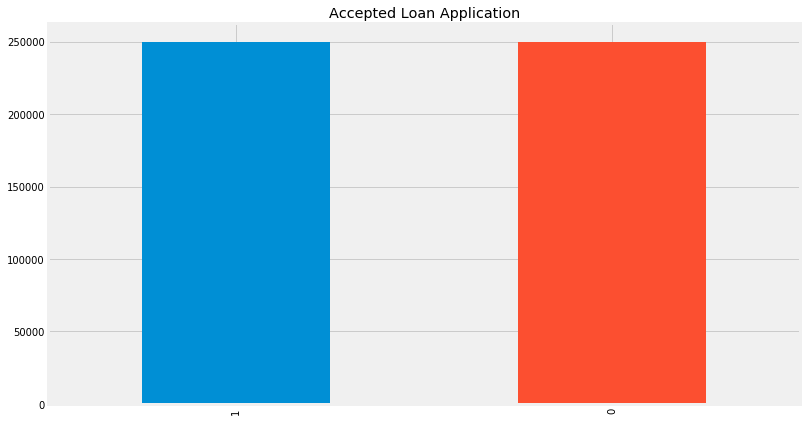

In [55]:
plt.figure(figsize=(12,7))
plt.title("Accepted Loan Application")
train['accepted'].value_counts().plot.bar()

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154463 entries, 2 to 499999
Data columns (total 23 columns):
row_id                            154463 non-null int64
loan_type                         154463 non-null int64
property_type                     154463 non-null int64
loan_purpose                      154463 non-null int64
occupancy                         154463 non-null int64
loan_amount                       154463 non-null float64
preapproval                       154463 non-null int64
msa_md                            154463 non-null int64
state_code                        154463 non-null int64
county_code                       154463 non-null int64
applicant_ethnicity               154463 non-null int64
applicant_race                    154463 non-null int64
applicant_sex                     154463 non-null int64
applicant_income                  142261 non-null float64
population                        153062 non-null float64
minority_population_pct           153061 no

In [228]:
train['accepted'].value_counts(normalize=True)

1    0.500228
0    0.499772
Name: accepted, dtype: float64

In [229]:
appli_45= train[train['state_code']==45]
appli_45['applicant_income'].corr(appli_45['loan_amount'])

0.6299807976879397

In [230]:
train[(train['state_code']==48) & (train['county_code'] != -1)].groupby(['county_code'])['accepted'].value_counts(normalize=True).head()

county_code  accepted
2            0           0.544118
             1           0.455882
3            1           0.513158
             0           0.486842
10           1           0.643836
Name: accepted, dtype: float64

In [28]:
overall= train[(train['state_code']==2) |(train['state_code'] == 4)]
state_2= train[train['state_code']==2]
state_4 = train[train['state_code']==4]

In [29]:
print(state_2.groupby(['loan_type'])['accepted'].value_counts(normalize=True)*100)

print()
print(overall['accepted'].value_counts(normalize=True))

loan_type  accepted
1          0           56.983829
           1           43.016171
2          1           50.336521
           0           49.663479
3          1           53.111740
           0           46.888260
4          0           53.875969
           1           46.124031
Name: accepted, dtype: float64

0    0.517332
1    0.482668
Name: accepted, dtype: float64


In [30]:
print(state_4.groupby(['loan_type'])['accepted'].value_counts(normalize=True)*100)

print()
print(overall['accepted'].value_counts(normalize=True))

loan_type  accepted
1          1           55.446772
           0           44.553228
2          1           54.838710
           0           45.161290
3          1           63.561418
           0           36.438582
4          1           62.222222
           0           37.777778
Name: accepted, dtype: float64

0    0.517332
1    0.482668
Name: accepted, dtype: float64


In [31]:
print('****State 2****')
print(state_2.groupby(['loan_type'])['accepted'].value_counts(normalize=True)*100)

print()

print("****State 4*****")
print(state_4.groupby(['loan_type'])['accepted'].value_counts(normalize=True)*100)

****State 2****
loan_type  accepted
1          0           56.983829
           1           43.016171
2          1           50.336521
           0           49.663479
3          1           53.111740
           0           46.888260
4          0           53.875969
           1           46.124031
Name: accepted, dtype: float64

****State 4*****
loan_type  accepted
1          1           55.446772
           0           44.553228
2          1           54.838710
           0           45.161290
3          1           63.561418
           0           36.438582
4          1           62.222222
           0           37.777778
Name: accepted, dtype: float64


In [110]:
train.head().T

,0,1,2,3,4
row_id,0,1,2,3,4
loan_type,3,1,2,1,1
property_type,1,1,1,1,1
loan_purpose,1,3,3,1,1
occupancy,1,1,1,1,1
loan_amount,70,178,163,155,305
preapproval,3,3,3,1,3
msa_md,18,369,16,305,24
state_code,37,52,10,47,37
county_code,246,299,306,180,20


In [538]:
def bar_chart(feature):
    accepted = train[train['accepted']==1][feature].value_counts()
    rejected = train[train['accepted']==0][feature].value_counts()
    df = pd.DataFrame([accepted,rejected])
    df.index = ['accepted','rejected']
    df.plot(kind='bar',stacked=True, figsize=(12,8))

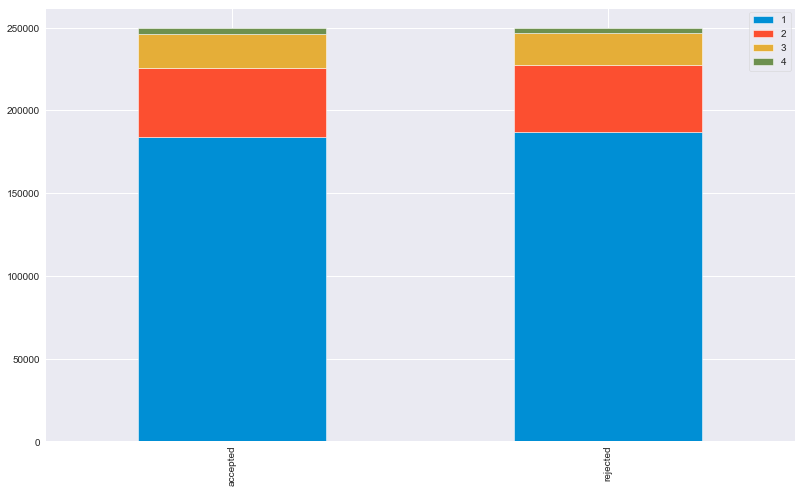

In [232]:
bar_chart('loan_type')

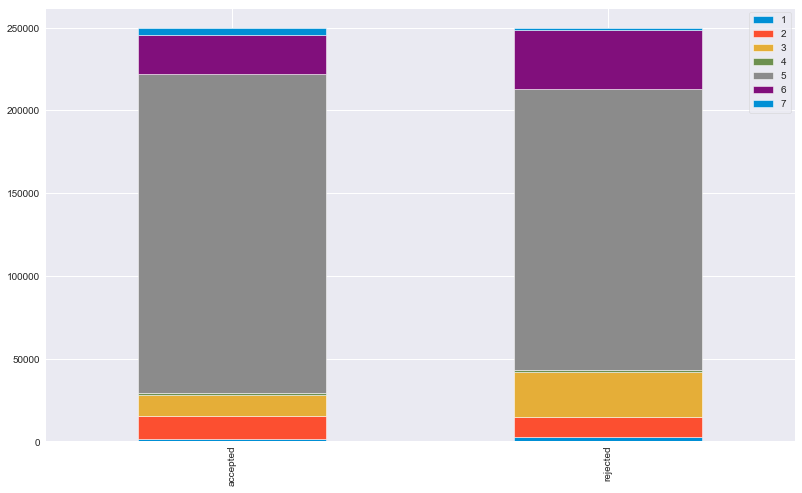

In [233]:
bar_chart('applicant_race')

In [234]:
train.groupby(['applicant_race'])['accepted'].value_counts(normalize=True)

applicant_race  accepted
1               0           0.664127
                1           0.335873
2               1           0.536807
                0           0.463193
3               0           0.674602
                1           0.325398
4               0           0.579735
                1           0.420265
5               1           0.531916
                0           0.468084
6               0           0.601584
                1           0.398416
7               1           0.795174
                0           0.204826
Name: accepted, dtype: float64

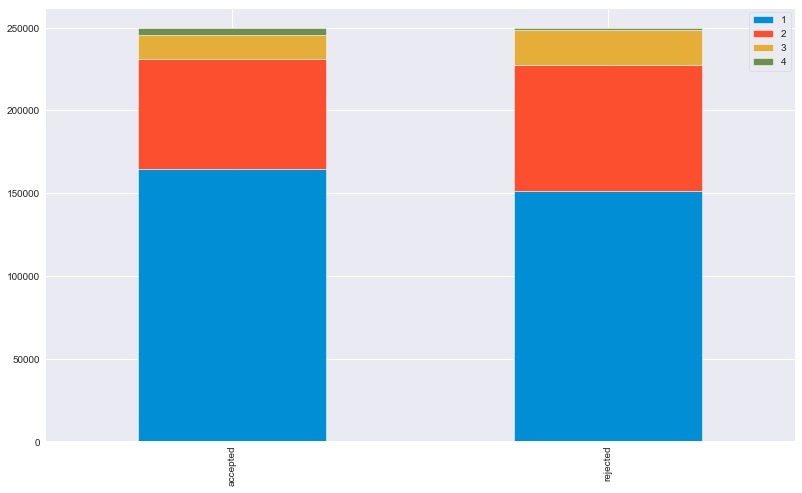

In [235]:
bar_chart('applicant_sex')

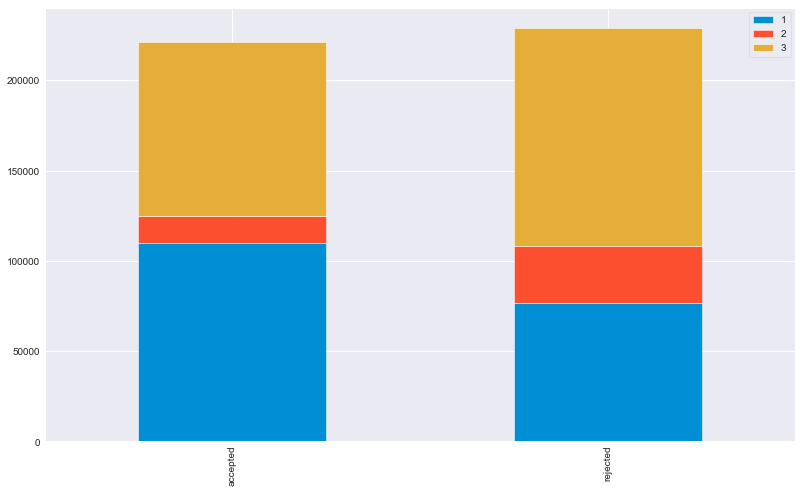

In [582]:
bar_chart('loan_purpose')

In [139]:
train.head(1)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.23,60588.0,50.933,716.0,2642.0,4536,False,1


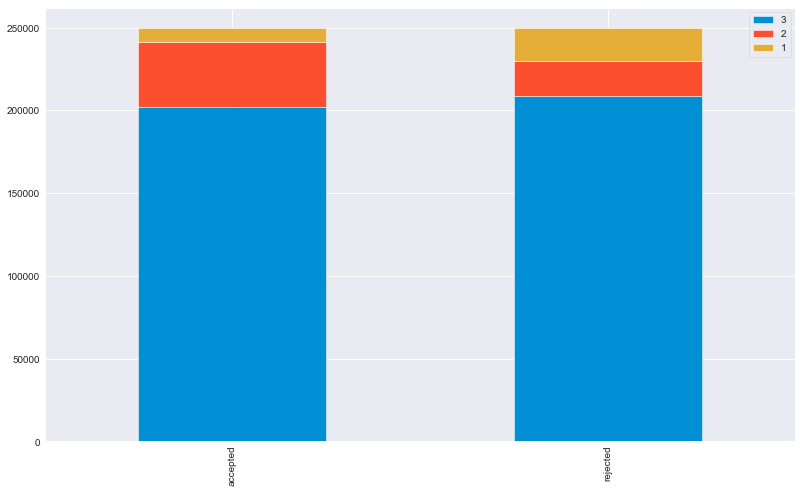

In [236]:
bar_chart('preapproval')

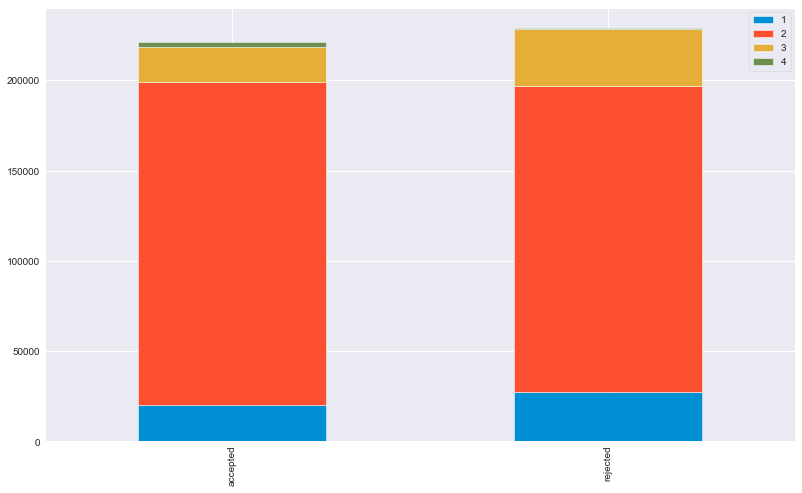

In [584]:
bar_chart('applicant_ethnicity')

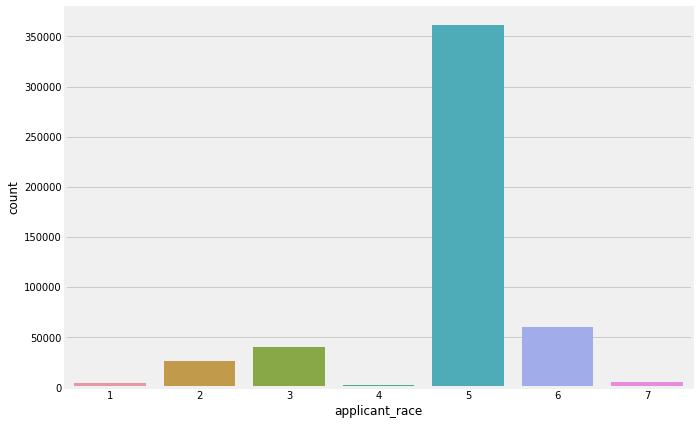

In [612]:
plt.figure(figsize=(10,7))
sns.countplot(x='applicant_race',data=train)

In [613]:
train['race'] = train['applicant_race'].apply(lambda x: '1' if x==5 else '0') 

In [614]:
train.drop(['applicant_race'],axis=1,inplace=True)

In [615]:
test['race'] = test['applicant_race'].apply(lambda x: '1' if x==5 else '0') 

In [616]:
test.drop(['applicant_race'],axis=1,inplace=True)

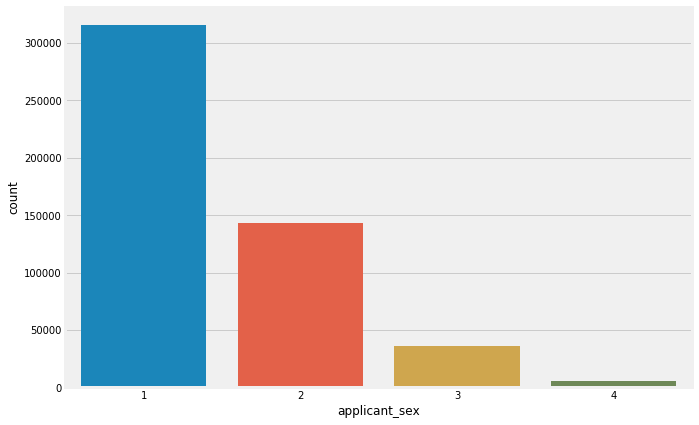

In [440]:
plt.figure(figsize=(10,7))
sns.countplot(x='applicant_sex',data=train)

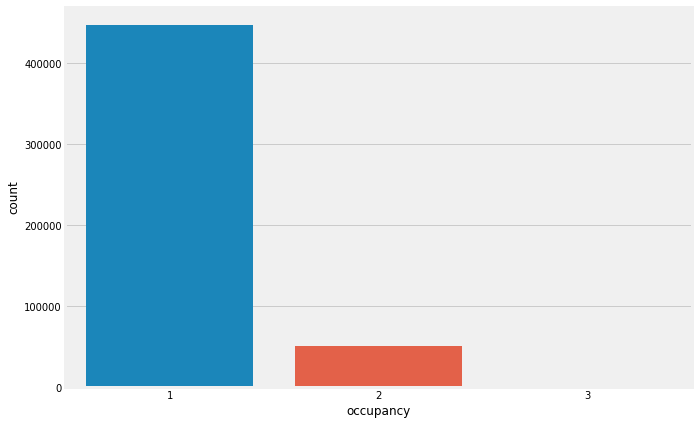

In [443]:
plt.figure(figsize=(10,7))
sns.countplot(x='occupancy',data=train)

In [617]:
train['occupancy'] = train['occupancy'].apply(lambda x: 1 if x==1 else '0')
test['occupancy'] = test['occupancy'].apply(lambda x: 1 if x==1 else '0')


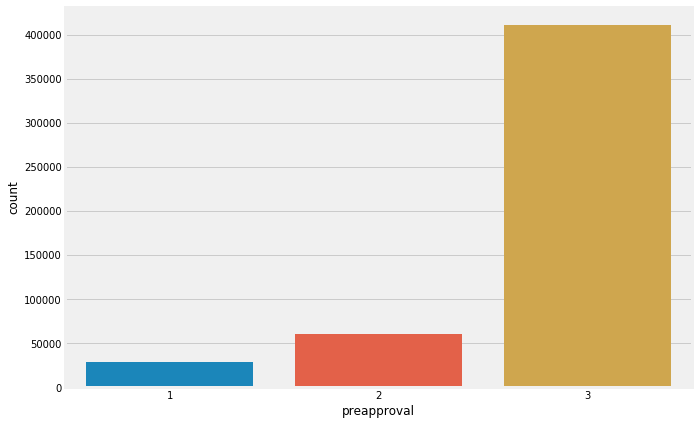

In [618]:
plt.figure(figsize=(10,7))
sns.countplot(x='preapproval',data=train)

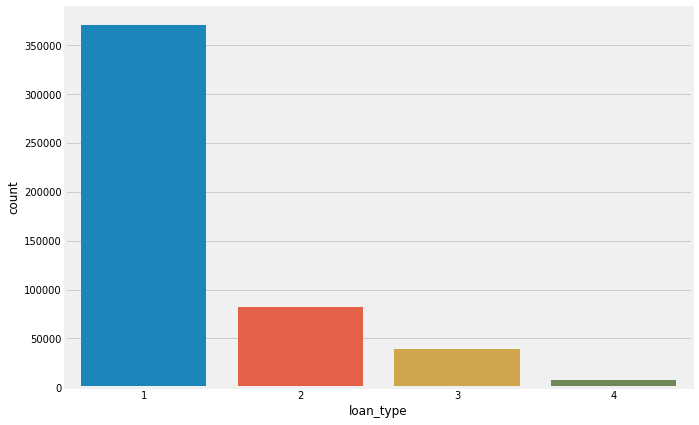

In [452]:
plt.figure(figsize=(10,7))
sns.countplot(x='loan_type',data=train)

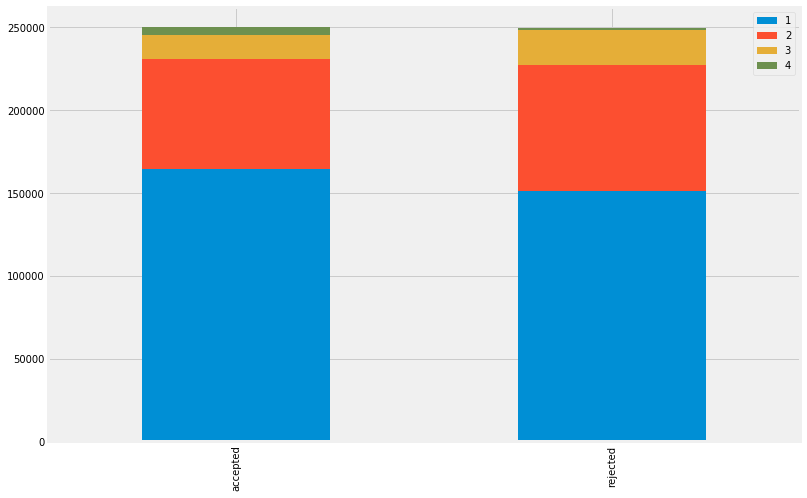

In [540]:
bar_chart('applicant_sex')

In [619]:
sex={1:'M', 2:'F', 3:'others', 4:'others'}
dataset=[train,test]
for data in dataset:
    data['applicant_sex']=data['applicant_sex'].replace(sex)

In [454]:
data_missing = (train.isnull().sum()/len(train))*100
data_missing = data_missing.drop(data_missing[data_missing==0].index).sort_values(ascending=False)

In [455]:
missing_data = pd.DataFrame({'Missing Percentage': data_missing})

In [456]:
missing_data

,Missing Percentage
applicant_income,7.9896
number_of_owner-occupied_units,4.5130
number_of_1_to_4_family_units,4.5060
tract_to_msa_md_income_pct,4.5028
minority_population_pct,4.4932
population,4.4930
ffiecmedian_family_income,4.4880


In [753]:
train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

In [726]:
train.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

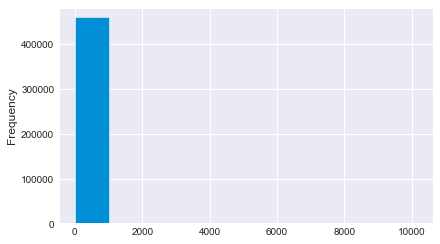

In [249]:
train['applicant_income'].plot.hist()

In [250]:
train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
race                                  0
dtype: int64

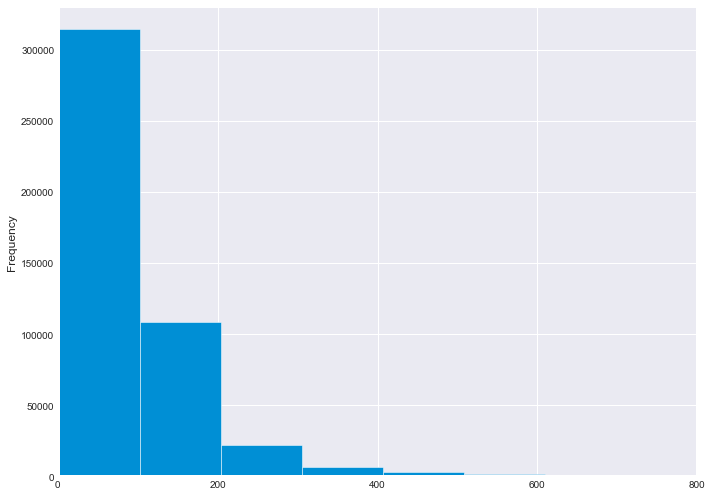

In [251]:
plt.figure(figsize=(10,7))
train['applicant_income'].plot.hist(bins=100)
plt.xlim([0,400])
plt.xticks(np.arange(0, 1000, step=200))
sns.set_style('darkgrid')
plt.tight_layout()

In [252]:
train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
race                                  0
dtype: int64

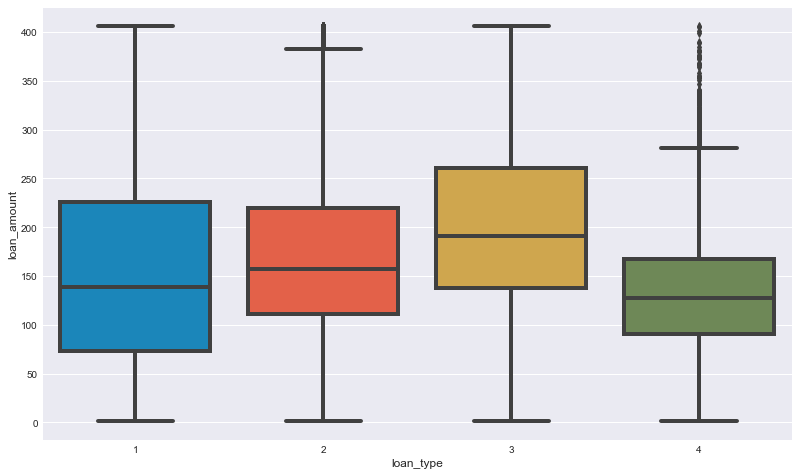

In [258]:
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_type',y='loan_amount',data=train[train['loan_amount']<train['loan_amount'].quantile(.90)])

In [257]:
train['loan_amount'].quantile(.90)

407.0

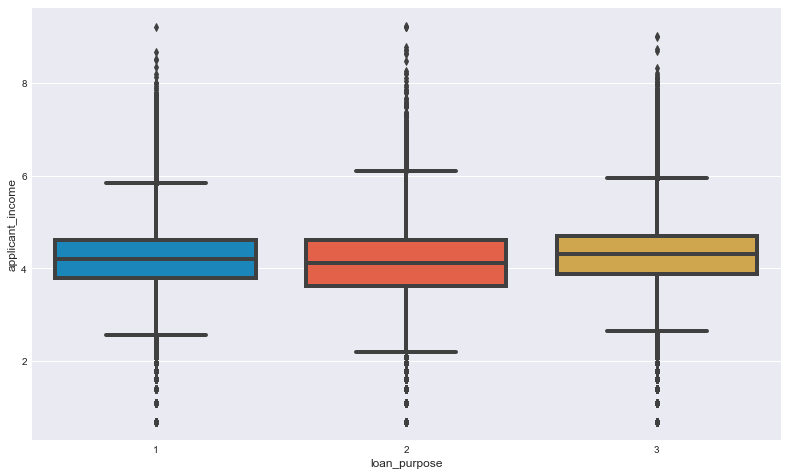

In [226]:
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_purpose',y='applicant_income',data=train)

In [541]:
train['applicant_income'].fillna(train['applicant_income'].median(),inplace=True)
test['applicant_income'].fillna(test['applicant_income'].median(),inplace=True)
#test['applicant_income'].fillna(test.groupby(['loan_purpose'])['applicant_income'].transform('median'),inplace=True)

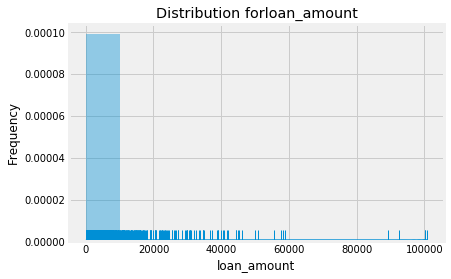

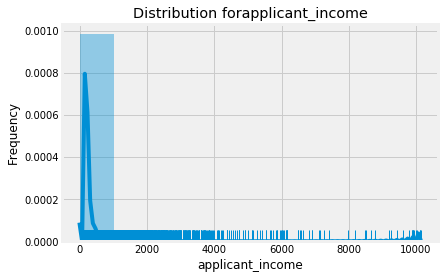

In [360]:
column=['loan_amount', 'applicant_income']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(train, column, hist= True)

In [542]:
train[['applicant_income','loan_amount']]=train[['applicant_income','loan_amount']].apply(lambda x: np.log(x+1))
test[['applicant_income','loan_amount']]=test[['applicant_income','loan_amount']].apply(lambda x: np.log(x+1))

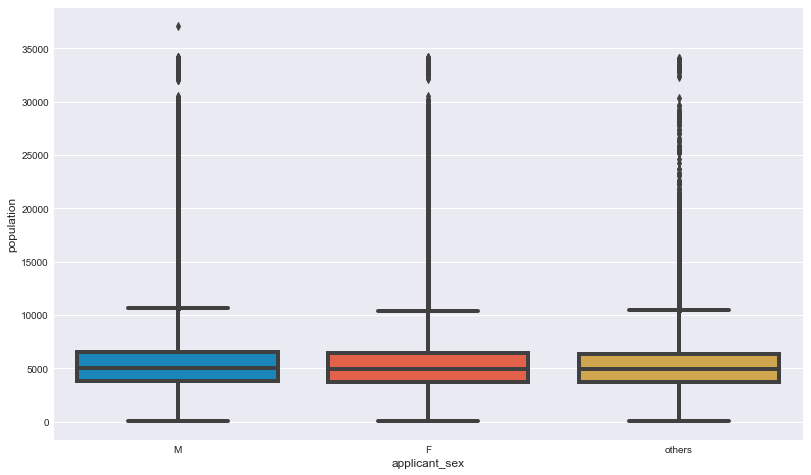

In [261]:
plt.figure(figsize=(12,8))
sns.boxplot(x='applicant_sex',y='population',data=train)

In [619]:
print(train[train['county_code']==-1]['accepted'].value_counts(normalize=True))

0    0.964083
1    0.035917
Name: accepted, dtype: float64


In [620]:
print(train[train['state_code']==-1]['accepted'].value_counts(normalize=True))
print(train[train['msa_md']==-1]['accepted'].value_counts(normalize=True))

0    0.970561
1    0.029439
Name: accepted, dtype: float64
0    0.658643
1    0.341357
Name: accepted, dtype: float64


In [543]:
train['msa_md'] = train['msa_md'].replace(-1,np.nan)
train['county_code'] = train['county_code'].replace(-1,np.nan)
train['state_code'] = train['state_code'].replace(-1,np.nan)
test['msa_md'] = test['msa_md'].replace(-1,np.nan)
test['county_code'] = test['county_code'].replace(-1,np.nan)
test['state_code'] = test['state_code'].replace(-1,np.nan)

In [544]:
train['msa_md'].fillna(train['msa_md'].value_counts().index[0],inplace=True)
test['msa_md'].fillna(test['msa_md'].value_counts().index[0],inplace=True)
train['county_code'].fillna(train['county_code'].value_counts().index[0],inplace=True)
test['county_code'].fillna(test['county_code'].value_counts().index[0],inplace=True)
train['state_code'].fillna(train['state_code'].value_counts().index[0],inplace=True)
test['state_code'].fillna(test['state_code'].value_counts().index[0],inplace=True)

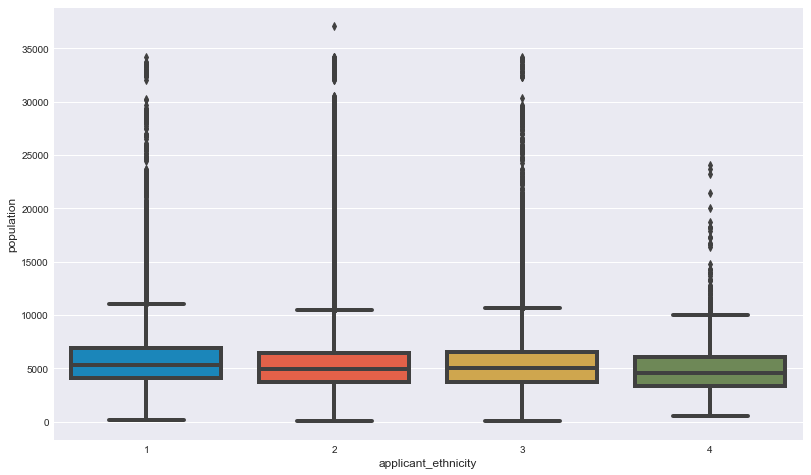

In [621]:
plt.figure(figsize=(12,8))
sns.boxplot(x='applicant_ethnicity',y='population',data=train)

In [545]:
train['population'].fillna(train['population'].median(),inplace=True)
test['population'].fillna(test['population'].median(),inplace=True)

In [546]:
train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                      0
population                            0
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [547]:
train['minority_population_pct'].fillna(train['minority_population_pct'].median(),inplace=True)
test['minority_population_pct'].fillna(test['minority_population_pct'].median(),inplace=True)


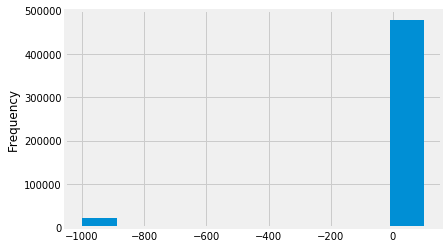

In [622]:
train['minority_population_pct'].plot.hist()

In [754]:
train['minority_population_pct']= (train['minority_population_pct']/100) * train['population']
test['minority_population_pct']= (test['minority_population_pct']/100) * train['population']


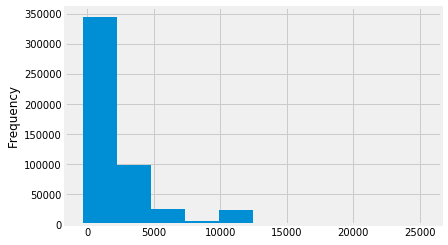

In [728]:
train['minority_population_pct'].plot.hist()

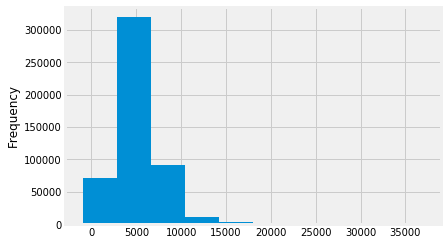

In [729]:
train['population'].plot.hist()

In [625]:
train[['minority_population_pct','population']]=train[['minority_population_pct','population']].apply(lambda x: np.log(x+1))
test[['minority_population_pct','population']]=test[['minority_population_pct','population']].apply(lambda x: np.log(x+1))

In [554]:
train['ffiecmedian_family_income'].fillna(train.groupby(['msa_md'])['ffiecmedian_family_income'].transform('median'),inplace=True)
test['ffiecmedian_family_income'].fillna(test.groupby(['msa_md'])['ffiecmedian_family_income'].transform('median'),inplace=True)

In [555]:
train['tract_to_msa_md_income_pct'].fillna(train['tract_to_msa_md_income_pct'].median(),inplace=True)
test['tract_to_msa_md_income_pct'].fillna(test['tract_to_msa_md_income_pct'].median(),inplace=True)
train['number_of_1_to_4_family_units'].fillna(train['number_of_1_to_4_family_units'].median(),inplace=True)
test['number_of_1_to_4_family_units'].fillna(test['number_of_1_to_4_family_units'].median(),inplace=True)
train['number_of_owner-occupied_units'].fillna(train['number_of_owner-occupied_units'].median(),inplace=True)
test['number_of_owner-occupied_units'].fillna(test['number_of_owner-occupied_units'].median(),inplace=True)

In [755]:
train['tract_to_msa_md_income_pct']=(train['tract_to_msa_md_income_pct']/100)* train['ffiecmedian_family_income']
train['tract_to_msa_md_income_pct']=(train['tract_to_msa_md_income_pct']/100)* train['ffiecmedian_family_income']

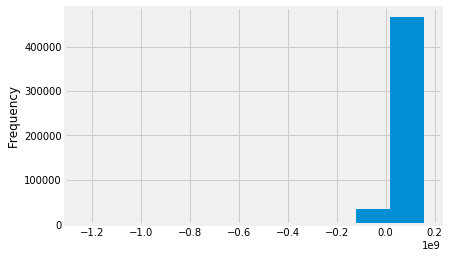

In [627]:
train['tract_to_msa_md_income_pct'].plot.hist()

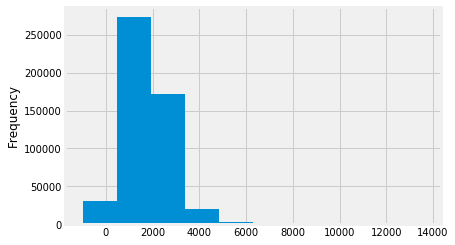

In [628]:
train['number_of_1_to_4_family_units'].plot.hist()

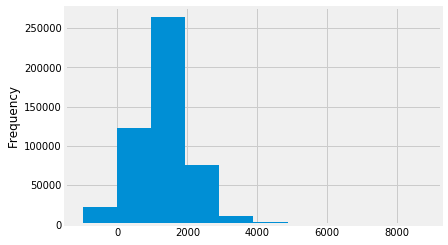

In [629]:
train['number_of_owner-occupied_units'].plot.hist()

In [560]:
train['number_of_1_to_4_family_units']=train['number_of_1_to_4_family_units'].apply(lambda x: np.log(x+1))
test['number_of_1_to_4_family_units']=test['number_of_1_to_4_family_units'].apply(lambda x: np.log(x+1))


In [561]:
train.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

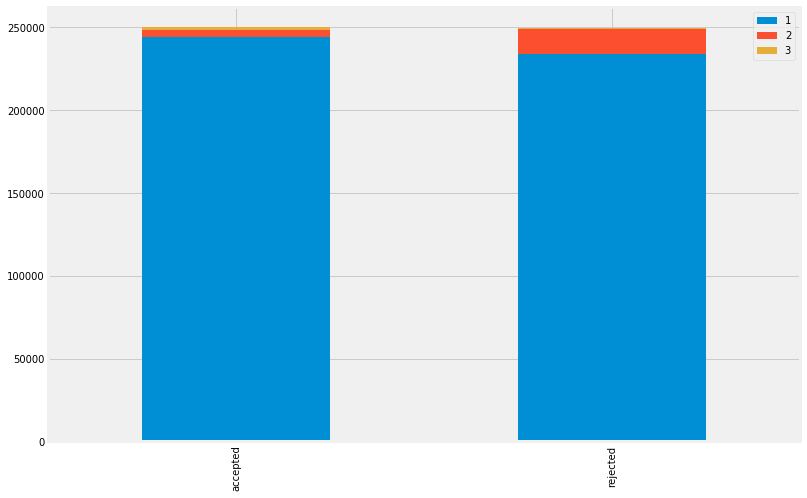

In [562]:
bar_chart('property_type')

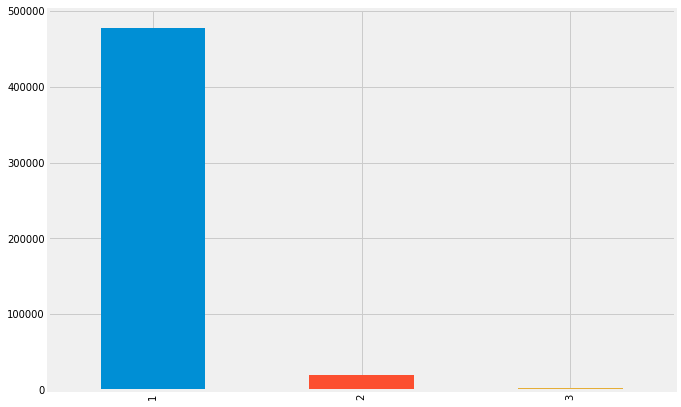

In [630]:
plt.figure(figsize=(10,7))
train['property_type'].value_counts().plot.bar()

In [564]:
train.groupby(['property_type'])['accepted'].value_counts()

property_type  accepted
1              1           244257
               0           233960
2              0            15282
               1             4459
3              1             1398
               0              644
Name: accepted, dtype: int64

In [477]:
train['property_type'] = train['property_type'].apply(lambda x: 1 if x==1 else 0)

In [478]:
test['property_type'] = test['property_type'].apply(lambda x: 1 if x==1 else 0)

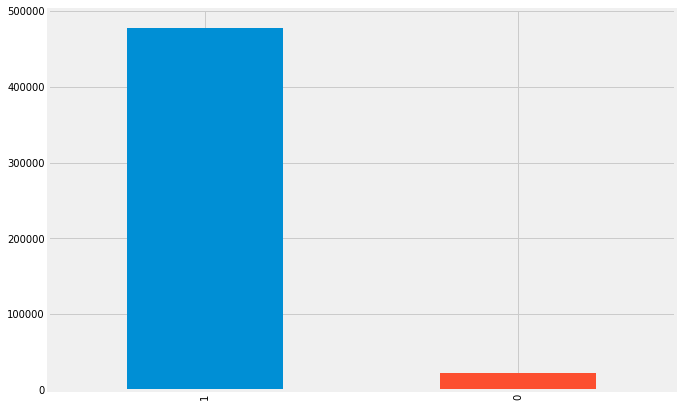

In [479]:
plt.figure(figsize=(10,7))
train['property_type'].value_counts().plot.bar()

In [689]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 no

In [632]:
train['race']= train['race'].astype(int)
test['race']= test['race'].astype(int)

In [633]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null object
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_sex                     500000 non-null object
applicant_income                  500000 non-null float64
population                        477535 non-null float64
minority_population_pct           499999 non-null float64
ffiecmedian_family_income         50000

In [756]:
train['co_applicant']=train['co_applicant'].apply(lambda x: 1 if x=='True' else 0)
test['co_applicant']=test['co_applicant'].apply(lambda x: 1 if x=='True' else 0)


In [635]:
train['applicant_sex']=train['applicant_sex'].apply(lambda x: 1 if x=='M' else 0)
test['applicant_sex']=test['applicant_sex'].apply(lambda x: 1 if x=='M' else 0)

In [757]:
train['loan_income_ratio']= train['applicant_income']/train['loan_amount']
test['loan_income_ratio']= test['applicant_income']/test['loan_amount']


In [758]:
mean_acceptance_rate = pd.DataFrame(train.groupby(['lender'])['accepted'].mean())

In [759]:
train= pd.merge(train,mean_acceptance_rate,how='left', on='lender')
test= pd.merge(test,mean_acceptance_rate,how='left', on='lender')

In [760]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 25 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 no

In [762]:
test.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'loan_income_ratio', 'accepted'],
      dtype='object')

In [763]:
train.columns=['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'loan_income_ratio',
       'lender_accepted_rate']
test.columns= ['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'loan_income_ratio', 'accepted']

In [764]:
#state_rate= pd.DataFrame(train.groupby(['state_code'])['accepted'].mean())

train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,loan_income_ratio,lender_accepted_rate
0,0,3,1,1,1,70.0,3,18,37,246,...,2743.58690,60588.0,1.869702e+07,716.0,2642.0,4536,0,1,0.342857,0.837209
1,1,1,1,3,1,178.0,3,369,52,299,...,918.35470,54821.0,3.005342e+07,1622.0,2108.0,2458,0,0,0.320225,0.168919
2,2,2,1,3,1,163.0,3,16,10,306,...,3733.79380,67719.0,4.585863e+07,760.0,1048.0,5710,0,1,0.411043,0.489632
3,3,1,1,1,1,155.0,1,305,47,180,...,416.42082,78439.0,6.152677e+07,2025.0,2299.0,5888,0,1,0.677419,0.691964
4,4,1,1,1,1,305.0,3,24,37,20,...,6732.00000,63075.0,3.270291e+07,1464.0,1847.0,289,0,1,0.232787,0.542994


In [765]:
#train= pd.merge(train,state_rate,how='inner', on='state_code')
#test = pd.merge(test,state_rate,how='inner', on='state_code')

In [395]:
test.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_sex', 'applicant_income',
       'population', 'minority_population_pct', 'ffiecmedian_family_income',
       'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units',
       'number_of_1_to_4_family_units', 'lender', 'co_applicant', 'race',
       'loan_income_ratio', 'lender_acceptance_rate', 'accepted'],
      dtype='object')

In [767]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 25 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 no

In [768]:
cols= ['loan_type','loan_purpose','property_type','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex']

train = pd.get_dummies(train,columns=cols,drop_first=True)

In [769]:
cols= ['loan_type','loan_purpose','property_type','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex']

test = pd.get_dummies(test,columns=cols,drop_first=True)

In [770]:
id = test['row_id']

In [771]:
train.drop(['row_id'],axis=1,inplace=True)
test.drop(['row_id'],axis=1,inplace=True)

In [772]:
train.head()

,loan_amount,msa_md,state_code,county_code,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,...,applicant_ethnicity_4,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_race_6,applicant_race_7,applicant_sex_2,applicant_sex_3,applicant_sex_4
0,70.0,18,37,246,24.0,6203.0,2743.58690,60588.0,1.869702e+07,716.0,...,0,0,0,0,1,0,0,0,0,0
1,178.0,369,52,299,57.0,5774.0,918.35470,54821.0,3.005342e+07,1622.0,...,0,0,0,0,1,0,0,0,0,0
2,163.0,16,10,306,67.0,6094.0,3733.79380,67719.0,4.585863e+07,760.0,...,0,0,0,0,1,0,0,0,0,0
3,155.0,305,47,180,105.0,6667.0,416.42082,78439.0,6.152677e+07,2025.0,...,0,0,0,0,1,0,0,0,0,0
4,305.0,24,37,20,71.0,6732.0,6732.00000,63075.0,3.270291e+07,1464.0,...,0,0,1,0,0,0,0,1,0,0


In [773]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics as sklm
from math import sqrt

In [774]:
from sklearn.model_selection import train_test_split

In [775]:
X = train.drop(['accepted'],axis=1)
y = train['accepted']

In [776]:
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [777]:
from sklearn.preprocessing import StandardScaler

In [778]:
scaler = StandardScaler()

In [779]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [780]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

In [781]:
from sklearn.metrics import accuracy_score, make_scorer,confusion_matrix,classification_report,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [782]:
num_folds = 10
seed = 8
def get_best_model_and_accuracy(model, params, X, y):
    scorer = make_scorer(roc_auc_score)
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=params,error_score=0., cv=kfold)                         
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print ("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print ("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print ("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print ("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    
    print ('Best parameter.{}'.format(grid.best_estimator_))


In [783]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set up some parameters for our grid search
# We will start with four different machine learning models
# logistic regression, KNN, Decision Tree, and Random Forest
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
forest_params = {'n_estimators': [10,20,30,40,50,70,90,100], 'max_depth': [None, 1, 3, 5, 7,8,9]}
knn_params = {'n_neighbors': [1, 3, 5, 7]}
ada_params = {'n_estimators': [200, 300, 500, 600,800,1000]}


# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
Adaboost = AdaBoostClassifier(random_state= 42)

In [784]:
model = lgb.LGBMClassifier()

In [785]:
model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [786]:
predict = model.predict(X_test)

In [787]:
print ('Accuracy: ' + str(accuracy_score(y_test,predict)))
print()
print('Confusion matrix: '+ str(confusion_matrix(y_test,predict)))

print ()
print ("Classification Report " + str(classification_report(y_test,predict)))

print ("Roc : " + str(roc_auc_score(y_test,predict)))

Accuracy: 0.72694

Confusion matrix: [[50458 24173]
 [16786 58583]]

Classification Report               precision    recall  f1-score   support

           0       0.75      0.68      0.71     74631
           1       0.71      0.78      0.74     75369

   micro avg       0.73      0.73      0.73    150000
   macro avg       0.73      0.73      0.73    150000
weighted avg       0.73      0.73      0.73    150000

Roc : 0.726691090575215


In [788]:
from catboost import CatBoostClassifier

In [789]:
cat = CatBoostClassifier()

In [790]:
cat.fit(X_train,y_train)

Learning rate set to 0.087922
0:	learn: 0.6676602	total: 385ms	remaining: 6m 25s
1:	learn: 0.6469476	total: 629ms	remaining: 5m 13s
2:	learn: 0.6310321	total: 919ms	remaining: 5m 5s
3:	learn: 0.6182940	total: 1.16s	remaining: 4m 47s
4:	learn: 0.6078405	total: 1.44s	remaining: 4m 46s
5:	learn: 0.5998915	total: 1.66s	remaining: 4m 35s
6:	learn: 0.5930010	total: 1.95s	remaining: 4m 36s
7:	learn: 0.5871302	total: 2.24s	remaining: 4m 37s
8:	learn: 0.5817543	total: 2.49s	remaining: 4m 34s
9:	learn: 0.5775855	total: 2.73s	remaining: 4m 30s
10:	learn: 0.5737473	total: 2.97s	remaining: 4m 27s
11:	learn: 0.5700775	total: 3.22s	remaining: 4m 24s
12:	learn: 0.5672258	total: 3.47s	remaining: 4m 23s
13:	learn: 0.5643641	total: 3.71s	remaining: 4m 21s
14:	learn: 0.5620449	total: 3.94s	remaining: 4m 18s
15:	learn: 0.5600360	total: 4.18s	remaining: 4m 17s
16:	learn: 0.5581338	total: 4.4s	remaining: 4m 14s
17:	learn: 0.5567682	total: 4.67s	remaining: 4m 14s
18:	learn: 0.5556912	total: 4.92s	remaining: 4

158:	learn: 0.5261765	total: 41.6s	remaining: 3m 39s
159:	learn: 0.5260681	total: 41.8s	remaining: 3m 39s
160:	learn: 0.5260267	total: 42s	remaining: 3m 39s
161:	learn: 0.5259731	total: 42.3s	remaining: 3m 38s
162:	learn: 0.5259416	total: 42.6s	remaining: 3m 38s
163:	learn: 0.5259024	total: 42.9s	remaining: 3m 38s
164:	learn: 0.5258566	total: 43.2s	remaining: 3m 38s
165:	learn: 0.5258094	total: 43.5s	remaining: 3m 38s
166:	learn: 0.5257719	total: 43.7s	remaining: 3m 38s
167:	learn: 0.5256901	total: 44s	remaining: 3m 37s
168:	learn: 0.5256435	total: 44.2s	remaining: 3m 37s
169:	learn: 0.5255822	total: 44.5s	remaining: 3m 37s
170:	learn: 0.5255443	total: 44.8s	remaining: 3m 37s
171:	learn: 0.5254657	total: 45s	remaining: 3m 36s
172:	learn: 0.5254117	total: 45.2s	remaining: 3m 36s
173:	learn: 0.5253735	total: 45.5s	remaining: 3m 35s
174:	learn: 0.5253267	total: 45.7s	remaining: 3m 35s
175:	learn: 0.5252881	total: 46s	remaining: 3m 35s
176:	learn: 0.5252136	total: 46.2s	remaining: 3m 34s
1

314:	learn: 0.5198165	total: 1m 22s	remaining: 2m 58s
315:	learn: 0.5198027	total: 1m 22s	remaining: 2m 58s
316:	learn: 0.5197742	total: 1m 22s	remaining: 2m 57s
317:	learn: 0.5197444	total: 1m 22s	remaining: 2m 57s
318:	learn: 0.5197143	total: 1m 23s	remaining: 2m 57s
319:	learn: 0.5196846	total: 1m 23s	remaining: 2m 56s
320:	learn: 0.5196572	total: 1m 23s	remaining: 2m 56s
321:	learn: 0.5196260	total: 1m 23s	remaining: 2m 56s
322:	learn: 0.5196020	total: 1m 24s	remaining: 2m 56s
323:	learn: 0.5195619	total: 1m 24s	remaining: 2m 55s
324:	learn: 0.5195414	total: 1m 24s	remaining: 2m 55s
325:	learn: 0.5195226	total: 1m 24s	remaining: 2m 55s
326:	learn: 0.5194999	total: 1m 24s	remaining: 2m 54s
327:	learn: 0.5194598	total: 1m 25s	remaining: 2m 54s
328:	learn: 0.5194339	total: 1m 25s	remaining: 2m 54s
329:	learn: 0.5194063	total: 1m 25s	remaining: 2m 54s
330:	learn: 0.5193905	total: 1m 25s	remaining: 2m 53s
331:	learn: 0.5193723	total: 1m 26s	remaining: 2m 53s
332:	learn: 0.5193476	total:

466:	learn: 0.5160675	total: 2m	remaining: 2m 18s
467:	learn: 0.5160532	total: 2m 1s	remaining: 2m 17s
468:	learn: 0.5160336	total: 2m 1s	remaining: 2m 17s
469:	learn: 0.5160091	total: 2m 1s	remaining: 2m 17s
470:	learn: 0.5159902	total: 2m 1s	remaining: 2m 16s
471:	learn: 0.5159598	total: 2m 2s	remaining: 2m 16s
472:	learn: 0.5159386	total: 2m 2s	remaining: 2m 16s
473:	learn: 0.5159163	total: 2m 2s	remaining: 2m 16s
474:	learn: 0.5158936	total: 2m 3s	remaining: 2m 15s
475:	learn: 0.5158684	total: 2m 3s	remaining: 2m 15s
476:	learn: 0.5158504	total: 2m 3s	remaining: 2m 15s
477:	learn: 0.5158276	total: 2m 3s	remaining: 2m 15s
478:	learn: 0.5158033	total: 2m 3s	remaining: 2m 14s
479:	learn: 0.5157873	total: 2m 4s	remaining: 2m 14s
480:	learn: 0.5157596	total: 2m 4s	remaining: 2m 14s
481:	learn: 0.5157415	total: 2m 4s	remaining: 2m 14s
482:	learn: 0.5157230	total: 2m 4s	remaining: 2m 13s
483:	learn: 0.5156989	total: 2m 5s	remaining: 2m 13s
484:	learn: 0.5156826	total: 2m 5s	remaining: 2m 

620:	learn: 0.5129147	total: 2m 40s	remaining: 1m 38s
621:	learn: 0.5128935	total: 2m 40s	remaining: 1m 37s
622:	learn: 0.5128767	total: 2m 41s	remaining: 1m 37s
623:	learn: 0.5128602	total: 2m 41s	remaining: 1m 37s
624:	learn: 0.5128293	total: 2m 41s	remaining: 1m 37s
625:	learn: 0.5128113	total: 2m 41s	remaining: 1m 36s
626:	learn: 0.5127932	total: 2m 42s	remaining: 1m 36s
627:	learn: 0.5127795	total: 2m 42s	remaining: 1m 36s
628:	learn: 0.5127594	total: 2m 42s	remaining: 1m 35s
629:	learn: 0.5127440	total: 2m 42s	remaining: 1m 35s
630:	learn: 0.5127208	total: 2m 43s	remaining: 1m 35s
631:	learn: 0.5127037	total: 2m 43s	remaining: 1m 35s
632:	learn: 0.5126913	total: 2m 43s	remaining: 1m 34s
633:	learn: 0.5126742	total: 2m 43s	remaining: 1m 34s
634:	learn: 0.5126615	total: 2m 44s	remaining: 1m 34s
635:	learn: 0.5126320	total: 2m 44s	remaining: 1m 34s
636:	learn: 0.5126155	total: 2m 44s	remaining: 1m 33s
637:	learn: 0.5125977	total: 2m 44s	remaining: 1m 33s
638:	learn: 0.5125820	total:

774:	learn: 0.5100812	total: 3m 21s	remaining: 58.4s
775:	learn: 0.5100705	total: 3m 21s	remaining: 58.2s
776:	learn: 0.5100506	total: 3m 21s	remaining: 57.9s
777:	learn: 0.5100301	total: 3m 22s	remaining: 57.7s
778:	learn: 0.5100119	total: 3m 22s	remaining: 57.4s
779:	learn: 0.5099766	total: 3m 22s	remaining: 57.2s
780:	learn: 0.5099609	total: 3m 22s	remaining: 56.9s
781:	learn: 0.5099319	total: 3m 23s	remaining: 56.6s
782:	learn: 0.5099221	total: 3m 23s	remaining: 56.4s
783:	learn: 0.5099026	total: 3m 23s	remaining: 56.1s
784:	learn: 0.5098859	total: 3m 23s	remaining: 55.9s
785:	learn: 0.5098608	total: 3m 24s	remaining: 55.6s
786:	learn: 0.5098425	total: 3m 24s	remaining: 55.3s
787:	learn: 0.5098223	total: 3m 24s	remaining: 55.1s
788:	learn: 0.5098115	total: 3m 24s	remaining: 54.8s
789:	learn: 0.5097865	total: 3m 25s	remaining: 54.5s
790:	learn: 0.5097496	total: 3m 25s	remaining: 54.3s
791:	learn: 0.5097346	total: 3m 25s	remaining: 54s
792:	learn: 0.5097148	total: 3m 25s	remaining: 5

930:	learn: 0.5073141	total: 4m 3s	remaining: 18s
931:	learn: 0.5072895	total: 4m 3s	remaining: 17.8s
932:	learn: 0.5072716	total: 4m 3s	remaining: 17.5s
933:	learn: 0.5072543	total: 4m 3s	remaining: 17.2s
934:	learn: 0.5072381	total: 4m 3s	remaining: 17s
935:	learn: 0.5072206	total: 4m 4s	remaining: 16.7s
936:	learn: 0.5072051	total: 4m 4s	remaining: 16.4s
937:	learn: 0.5071862	total: 4m 4s	remaining: 16.2s
938:	learn: 0.5071716	total: 4m 4s	remaining: 15.9s
939:	learn: 0.5071549	total: 4m 5s	remaining: 15.7s
940:	learn: 0.5071399	total: 4m 5s	remaining: 15.4s
941:	learn: 0.5071243	total: 4m 5s	remaining: 15.1s
942:	learn: 0.5071105	total: 4m 5s	remaining: 14.9s
943:	learn: 0.5070915	total: 4m 6s	remaining: 14.6s
944:	learn: 0.5070756	total: 4m 6s	remaining: 14.3s
945:	learn: 0.5070564	total: 4m 6s	remaining: 14.1s
946:	learn: 0.5070387	total: 4m 7s	remaining: 13.8s
947:	learn: 0.5070201	total: 4m 7s	remaining: 13.6s
948:	learn: 0.5070040	total: 4m 7s	remaining: 13.3s
949:	learn: 0.50

In [791]:
predict = cat.predict(X_test)

In [792]:
print ('Accuracy: ' + str(accuracy_score(y_test,predict)))
print()
print('Confusion matrix: '+ str(confusion_matrix(y_test,predict)))

print ()
print ("Classification Report " + str(classification_report(y_test,predict)))

print ("Roc : " + str(roc_auc_score(y_test,predict)))

Accuracy: 0.7299466666666666

Confusion matrix: [[50700 23931]
 [16577 58792]]

Classification Report               precision    recall  f1-score   support

           0       0.75      0.68      0.71     74631
           1       0.71      0.78      0.74     75369

   micro avg       0.73      0.73      0.73    150000
   macro avg       0.73      0.73      0.73    150000
weighted avg       0.73      0.73      0.73    150000

Roc : 0.729698912450421


In [515]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [516]:
Xgb = xgb.predict(X_test)

In [517]:
print ('Accuracy: ' + str(accuracy_score(y_test,Xgb)))
print()
print('Confusion matrix: '+ str(confusion_matrix(y_test,Xgb)))

print ()
print ("Classification Report " + str(classification_report(y_test,Xgb)))

print ("Roc : " + str(roc_auc_score(y_test,Xgb)))

Accuracy: 0.7196933333333333

Confusion matrix: [[50111 25009]
 [17037 57843]]

Classification Report               precision    recall  f1-score   support

           0       0.75      0.67      0.70     75120
           1       0.70      0.77      0.73     74880

   micro avg       0.72      0.72      0.72    150000
   macro avg       0.72      0.72      0.72    150000
weighted avg       0.72      0.72      0.72    150000

Roc : 0.7197776506307856


In [793]:
prediction = cat.predict(test)

In [794]:
my_submission=pd.DataFrame({'row_Id': id,'accepted': prediction})

In [795]:
my_submission.to_csv('submission.csv', index=False)

In [796]:
my_submission['accepted']= my_submission['accepted'].astype(int)

In [797]:
my_submission.to_csv('submission.csv', index=False)